In [10]:
import sklearn
from sklearn.datasets import fetch_olivetti_faces
from sklearn.datasets import fetch_openml
import os

print(sklearn.__version__)

datasets_path = "../../../../datasets_data/faces_data"
os.environ['OPENML_URL'] = 'https://openml.mirror.example.com/api/v1/json/'

1.6.1


In [26]:

# olivetti_faces = fetch_olivetti_faces(data_home=datasets_path, shuffle=True)
olivetti_faces = fetch_openml(name='olivetti_faces',
                              data_home=datasets_path,
                              version=1,
                              as_frame=False
)

print(olivetti_faces.data.shape)
print(olivetti_faces.target.shape)
# print(olivetti_faces.images.shape)


(400, 4096)
(400,)


In [24]:
set1 = set(olivetti_faces.target)
print(set1)
print()

print(len(set1))

{'29', '30', '24', '11', '33', '3', '23', '22', '13', '32', '26', '31', '0', '9', '7', '12', '5', '14', '1', '2', '16', '34', '8', '18', '25', '35', '21', '28', '10', '37', '36', '6', '27', '38', '15', '20', '19', '4', '39', '17'}

40


In [ ]:
face_data, face_target = olivetti_faces.data, olivetti_faces.target

print("最小像素值:", face_data.min())
print("最大像素值:", face_data.max())

最小像素值: 0.0
最大像素值: 1.0


In [27]:
print(olivetti_faces.data)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


In [19]:
print(olivetti_faces.target)

['0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '3' '3' '3' '3' '3' '3'
 '3' '3' '3' '3' '4' '4' '4' '4' '4' '4' '4' '4' '4' '4' '5' '5' '5' '5'
 '5' '5' '5' '5' '5' '5' '6' '6' '6' '6' '6' '6' '6' '6' '6' '6' '7' '7'
 '7' '7' '7' '7' '7' '7' '7' '7' '8' '8' '8' '8' '8' '8' '8' '8' '8' '8'
 '9' '9' '9' '9' '9' '9' '9' '9' '9' '9' '10' '10' '10' '10' '10' '10'
 '10' '10' '10' '10' '11' '11' '11' '11' '11' '11' '11' '11' '11' '11'
 '12' '12' '12' '12' '12' '12' '12' '12' '12' '12' '13' '13' '13' '13'
 '13' '13' '13' '13' '13' '13' '14' '14' '14' '14' '14' '14' '14' '14'
 '14' '14' '15' '15' '15' '15' '15' '15' '15' '15' '15' '15' '16' '16'
 '16' '16' '16' '16' '16' '16' '16' '16' '17' '17' '17' '17' '17' '17'
 '17' '17' '17' '17' '18' '18' '18' '18' '18' '18' '18' '18' '18' '18'
 '19' '19' '19' '19' '19' '19' '19' '19' '19' '19' '20' '20' '20' '20'
 '20' '20' '20' '20' '20' '20' '21' '21' '21' '21' '21' '21' '21' '

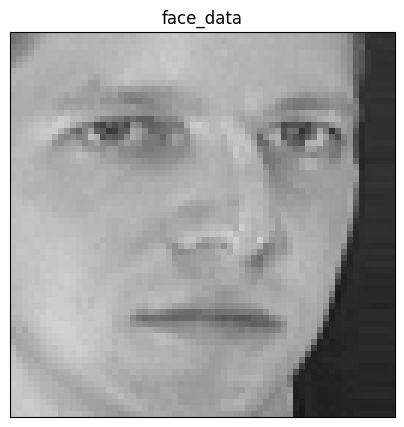

In [32]:
import matplotlib.pyplot as plt
import numpy as np


image_matrix = face_data[1].reshape(64, 64)

# 创建画布和坐标轴
fig, ax = plt.subplots(figsize=(5, 5))

# 隐藏坐标轴
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("face_data")

ax.imshow(image_matrix,
            cmap=plt.cm.gray,    # 使用灰度颜色映射
            vmin=0,              # 显式设置最小值
            vmax=1)              # 显式设置最大值

In [33]:
import torch
import torch.nn as nn

In [49]:
print(face_target.dtype)

face_target = face_target.astype(int)

print(face_target.dtype)

object
int32


In [52]:
face_data = torch.tensor(face_data, dtype=torch.float)
face_target = torch.tensor(face_target, dtype=torch.long)

In [53]:
face_data.shape

torch.Size([400, 4096])

In [55]:
face_target.shape

torch.Size([400])

In [56]:
dataset = [(img,lbl) for img,lbl in zip(face_data, face_target)]
dataset[0]

(tensor([0.3099, 0.3678, 0.4174,  ..., 0.1529, 0.1612, 0.1570]), tensor(0))

In [62]:
train_data = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=True)
print(len(train_data)) # 分组数

40


In [ ]:
#  定义神经网络模型
class MLPClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(64*64, 128),
            nn.ReLU(),
            nn.Dropout(0.5),  # 正则化
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 40)  # Olivetti有40个类别
        )

    def forward(self, x):
        return self.layers(x)

model = MLPClassifier()

In [70]:
# 训练配置
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizers = {
    "Adam": optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4),  # L2正则化
    "SGD": optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4),
    "RMSProp": optim.RMSprop(model.parameters(), lr=0.001, weight_decay=1e-4)
}

In [67]:
# 训练函数
def train_model(optimizer_name, num_epochs=20):
    optimizer = optimizers[optimizer_name]
    train_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0

        for images, labels in train_data:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_data.dataset)
        train_losses.append(epoch_loss)
        print(f"{optimizer_name} Epoch {epoch+1}/{num_epochs} Loss: {epoch_loss:.4f}")

    return train_losses

Adam Epoch 1/20 Loss: 3.7578
Adam Epoch 2/20 Loss: 3.7083
Adam Epoch 3/20 Loss: 3.6919
Adam Epoch 4/20 Loss: 3.6912
Adam Epoch 5/20 Loss: 3.6901
Adam Epoch 6/20 Loss: 3.6918
Adam Epoch 7/20 Loss: 3.6914
Adam Epoch 8/20 Loss: 3.6908
Adam Epoch 9/20 Loss: 3.6913
Adam Epoch 10/20 Loss: 3.6910
Adam Epoch 11/20 Loss: 3.6896
Adam Epoch 12/20 Loss: 3.6906
Adam Epoch 13/20 Loss: 3.6896
Adam Epoch 14/20 Loss: 3.6901
Adam Epoch 15/20 Loss: 3.6903
Adam Epoch 16/20 Loss: 3.6906
Adam Epoch 17/20 Loss: 3.6909
Adam Epoch 18/20 Loss: 3.6915
Adam Epoch 19/20 Loss: 3.6904
Adam Epoch 20/20 Loss: 3.6897
SGD Epoch 1/20 Loss: 3.6933
SGD Epoch 2/20 Loss: 3.6929
SGD Epoch 3/20 Loss: 3.6932
SGD Epoch 4/20 Loss: 3.6917
SGD Epoch 5/20 Loss: 3.6917
SGD Epoch 6/20 Loss: 3.6928
SGD Epoch 7/20 Loss: 3.6917
SGD Epoch 8/20 Loss: 3.6910
SGD Epoch 9/20 Loss: 3.6910
SGD Epoch 10/20 Loss: 3.6927
SGD Epoch 11/20 Loss: 3.6939
SGD Epoch 12/20 Loss: 3.6915
SGD Epoch 13/20 Loss: 3.6930
SGD Epoch 14/20 Loss: 3.6910
SGD Epoch 15

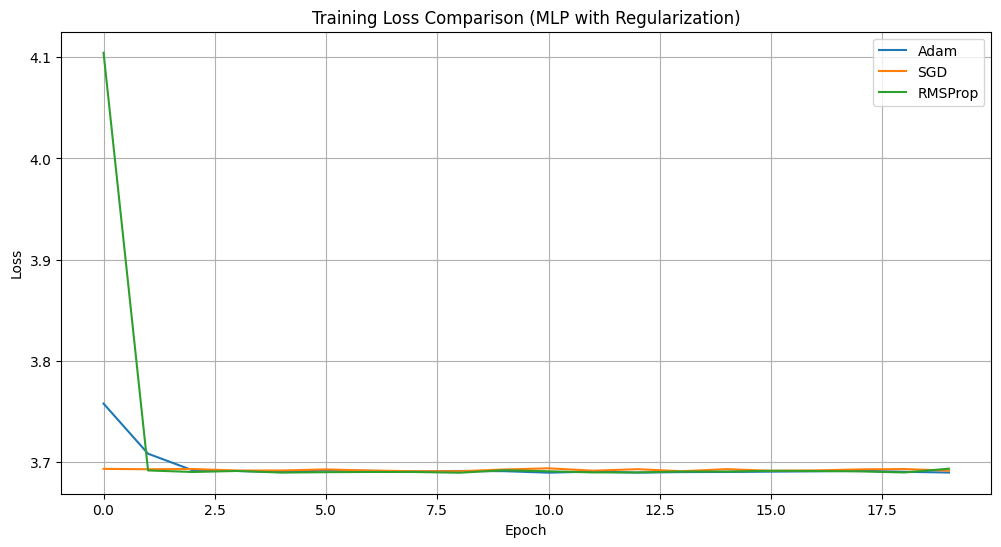

In [ ]:
# 执行训练和可视化

plt.figure(figsize=(12, 6))

for optimizer_name in ["Adam", "SGD", "RMSProp"]:
    losses = train_model(optimizer_name, num_epochs=20)
    plt.plot(losses, label=optimizer_name)

plt.title("Training Loss Comparison (MLP with Regularization)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()